## Example: Applying TigerTail to Birthday Gift Data

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../TT')
from tigertail import TimeFrame, TimeSeries, EventSeries

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100, replace=False)
gift_timestamp

array(['1999-11-18T07:06:00.000000000', '1999-11-18T12:20:00.000000000',
       '1999-11-18T23:44:00.000000000', '1999-11-18T04:14:00.000000000',
       '1999-11-18T16:27:00.000000000', '1999-11-18T22:44:00.000000000',
       '1999-11-18T06:21:00.000000000', '1999-11-18T22:04:00.000000000',
       '1999-11-18T07:16:00.000000000', '1999-11-18T21:12:00.000000000',
       '1999-11-18T18:55:00.000000000', '1999-11-18T21:52:00.000000000',
       '1999-11-18T14:50:00.000000000', '1999-11-18T04:18:00.000000000',
       '1999-11-18T11:33:00.000000000', '1999-11-18T14:32:00.000000000',
       '1999-11-18T00:46:00.000000000', '1999-11-18T18:15:00.000000000',
       '1999-11-18T14:15:00.000000000', '1999-11-18T05:31:00.000000000',
       '1999-11-18T07:07:00.000000000', '1999-11-18T23:21:00.000000000',
       '1999-11-18T21:04:00.000000000', '1999-11-18T16:06:00.000000000',
       '1999-11-18T20:59:00.000000000', '1999-11-18T15:59:00.000000000',
       '1999-11-18T21:20:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:30:00     0.036826
1999-11-18 00:46:00     0.293705
1999-11-18 00:54:00     0.471440
1999-11-18 01:00:00     0.234255
1999-11-18 01:34:00     0.549357
...                          ...
1999-11-18 23:21:00     0.850524
1999-11-18 23:38:00     0.119299
1999-11-18 23:44:00     0.813172
1999-11-18 23:53:00     0.327150
1999-11-19 00:00:00     0.779491

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

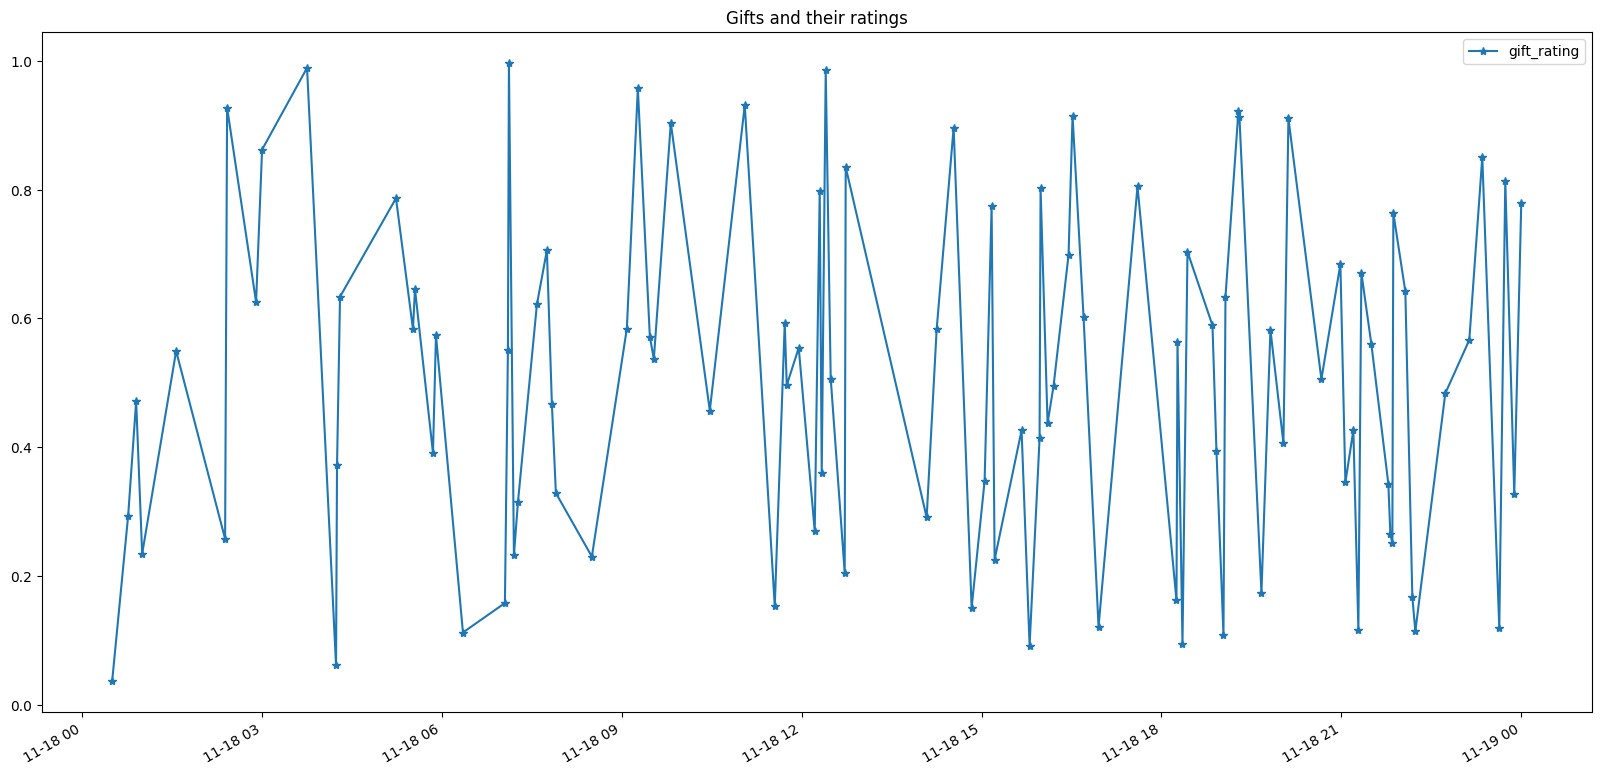

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [4]:
gift_es = EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [5]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.267324
1999-11-18 01:00:00    0.391806
1999-11-18 02:00:00    0.603439
1999-11-18 03:00:00    0.925545
1999-11-18 04:00:00    0.355927
1999-11-18 05:00:00    0.596053
1999-11-18 06:00:00    0.112138
1999-11-18 07:00:00    0.486126
1999-11-18 08:00:00    0.229984
1999-11-18 09:00:00    0.710729
1999-11-18 10:00:00    0.456713
1999-11-18 11:00:00    0.545421
1999-11-18 12:00:00    0.565507
1999-11-18 13:00:00    0.000000
1999-11-18 14:00:00    0.480128
1999-11-18 15:00:00    0.440018
1999-11-18 16:00:00    0.544909
1999-11-18 17:00:00    0.805233
1999-11-18 18:00:00    0.417689
1999-11-18 19:00:00    0.555524
1999-11-18 20:00:00    0.626608
1999-11-18 21:00:00    0.415652
1999-11-18 22:00:00    0.351738
1999-11-18 23:00:00    0.535326
1999-11-19 00:00:00    0.779491
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

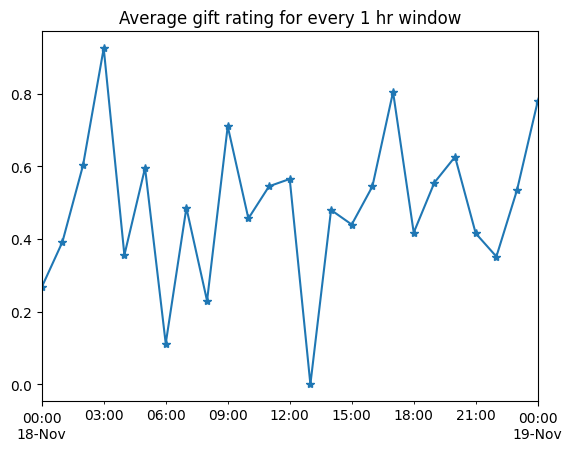

In [6]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [7]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:30:00    0.036826
1999-11-18 00:35:00    0.000000
1999-11-18 00:40:00    0.000000
1999-11-18 00:45:00    0.293705
1999-11-18 00:50:00    0.471440
                         ...   
1999-11-18 23:40:00    0.813172
1999-11-18 23:45:00    0.000000
1999-11-18 23:50:00    0.327150
1999-11-18 23:55:00    0.000000
1999-11-19 00:00:00    0.779491
Freq: 5min, Length: 283, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

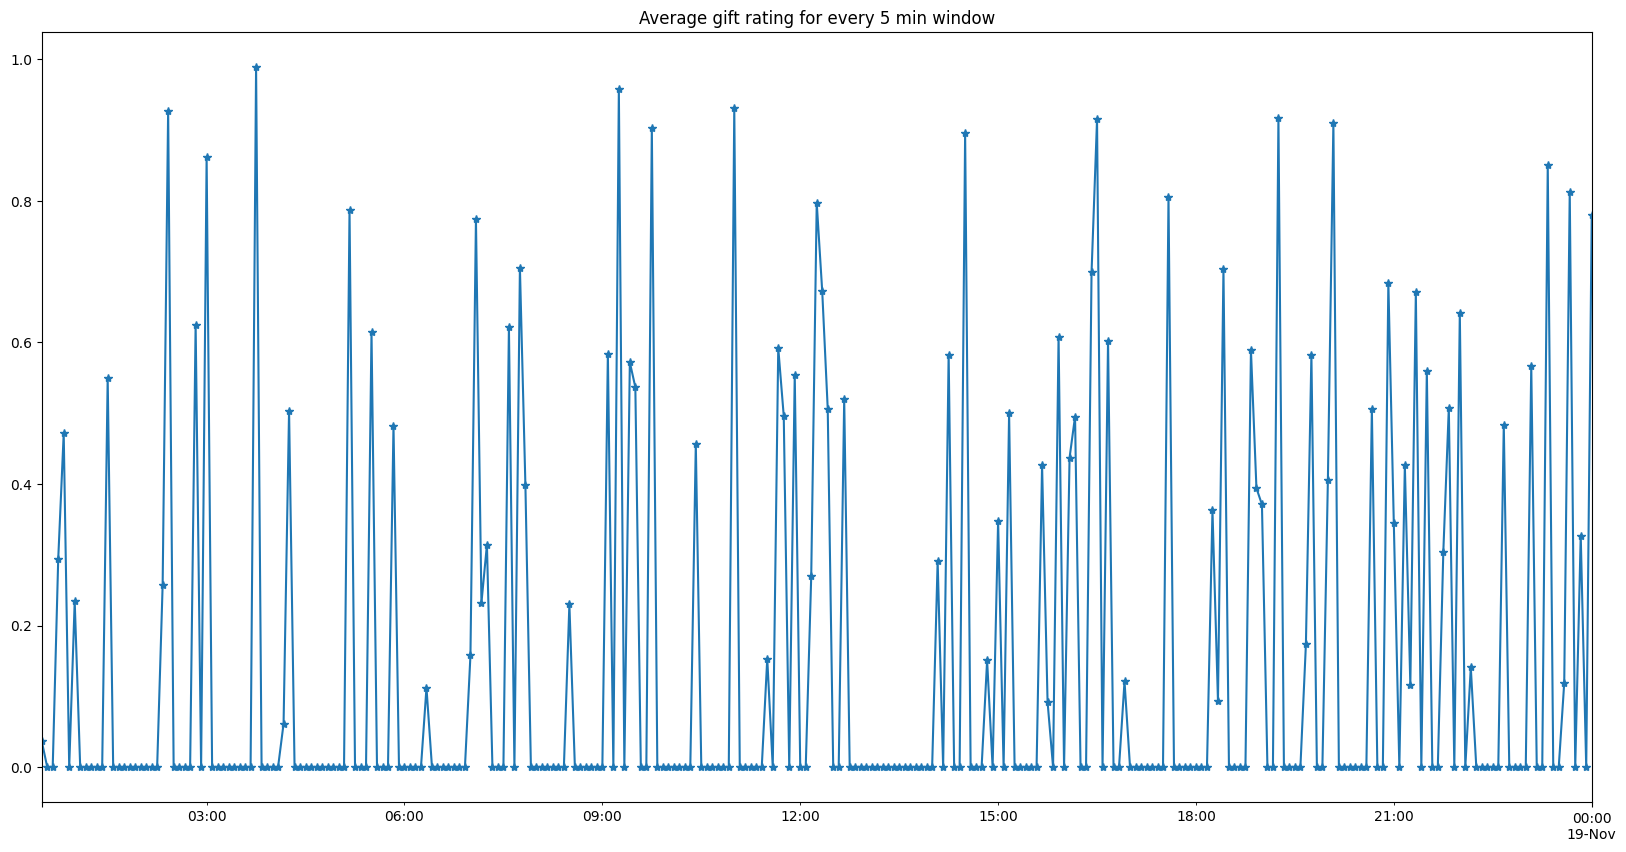

In [8]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

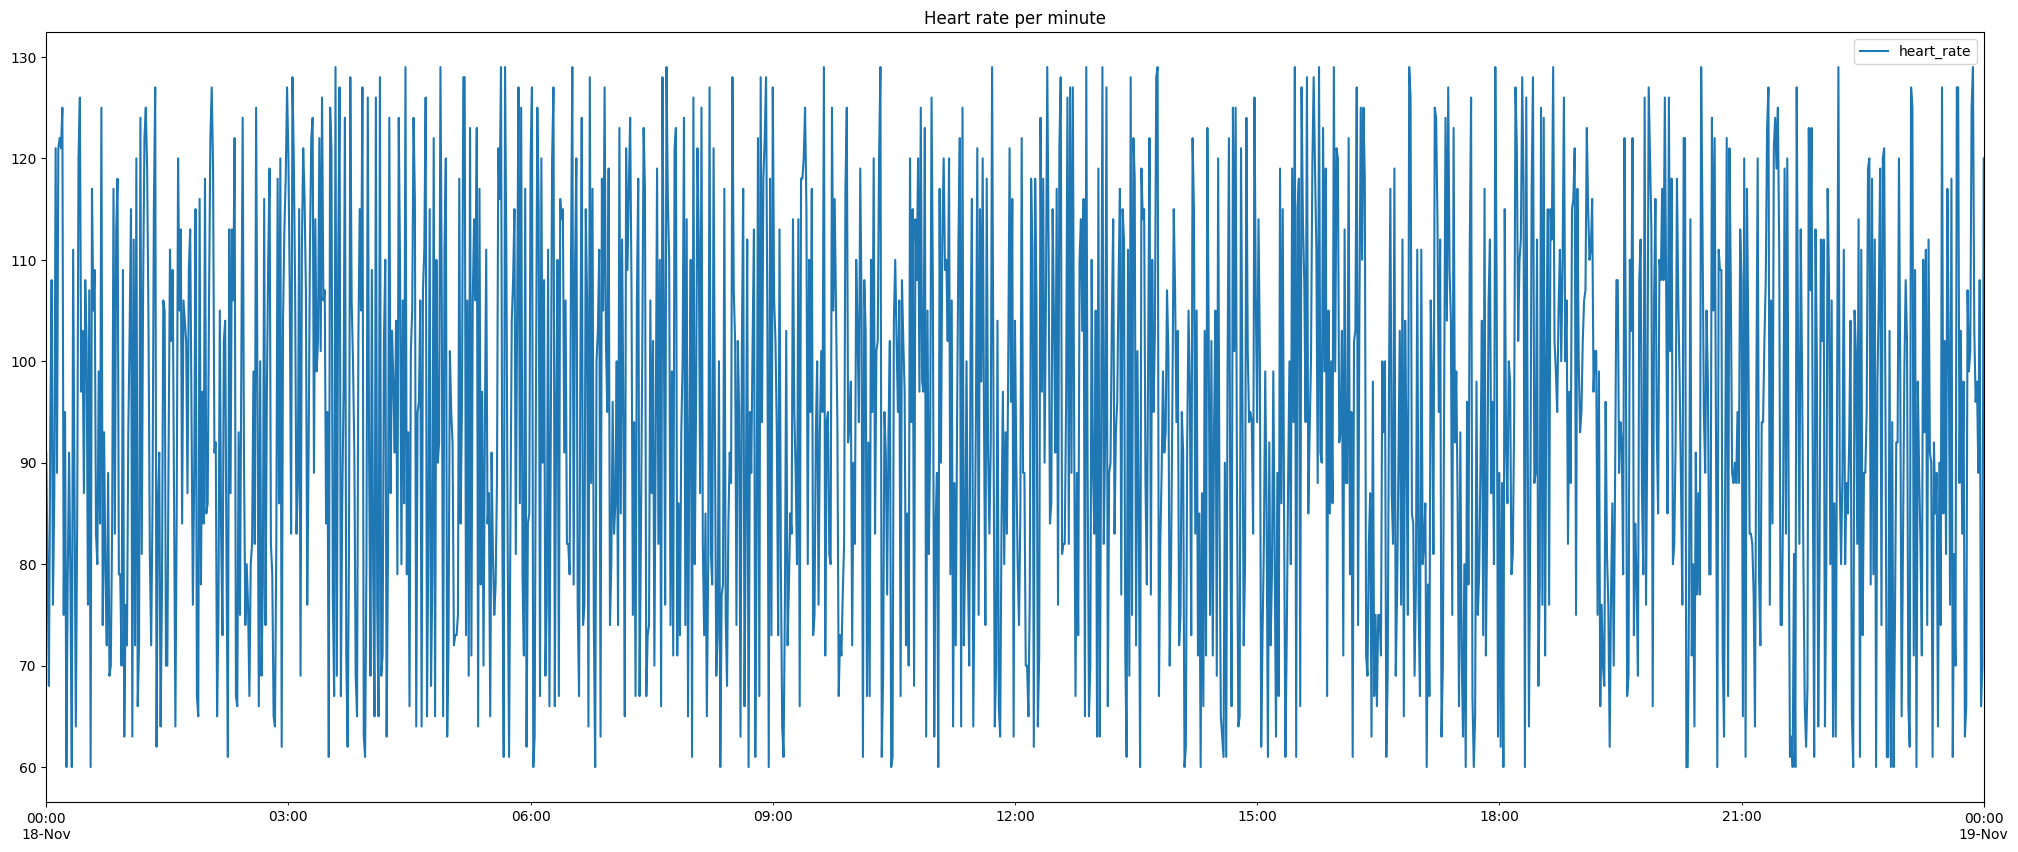

In [9]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [10]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 162,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 158,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 157,
 106,
 109,
 114,
 124,
 154,
 164,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 156,
 95,
 95,
 95,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 159,
 154,
 162,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 103,
 104,
 106,
 109,
 114,
 124,
 154,
 157,
 106,
 109,
 114,
 124,
 154,
 164,
 96,
 96,
 96

In [11]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

ValueError: Length of values (2874) does not match length of index (1441)

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [ ]:
hr_ts = TimeSeries(new_hr_df, agg_func=np.mean)

<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

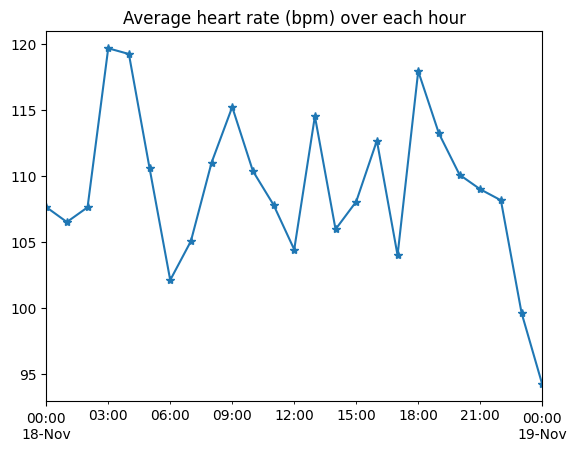

In [ ]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

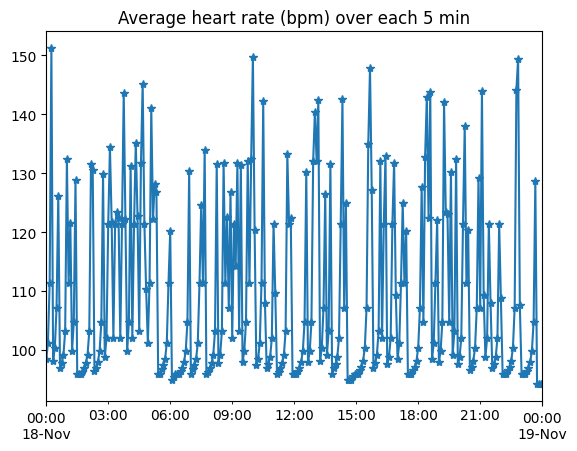

In [ ]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [ ]:
tf = TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

In [ ]:
# there's an NaN value for the last timestamp for gift_rating since there are no events 
# at that hour, the last row of the resulting dataframe could be deleted or kept

tf.window('1h')

,gift_rating,heart_rate
1999-11-18 00:00:00,0.104682,107.616667
1999-11-18 01:00:00,0.540416,106.483333
1999-11-18 02:00:00,0.329240,107.600000
1999-11-18 03:00:00,0.473213,119.650000
1999-11-18 04:00:00,0.397122,119.216667
1999-11-18 05:00:00,0.574552,110.566667
1999-11-18 06:00:00,0.789055,102.083333
1999-11-18 07:00:00,0.314060,105.033333
1999-11-18 08:00:00,0.301684,110.983333
1999-11-18 09:00:00,0.409938,115.200000


Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

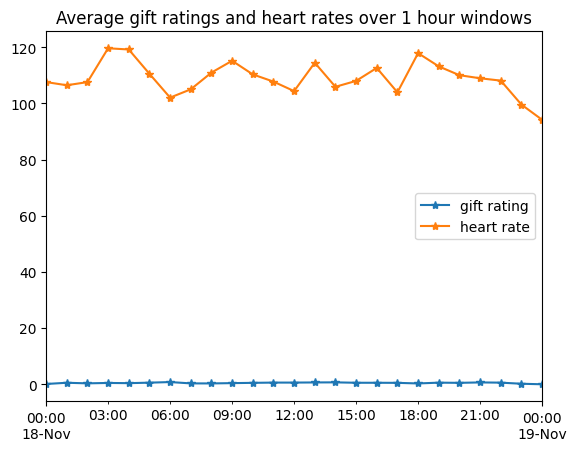

In [ ]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

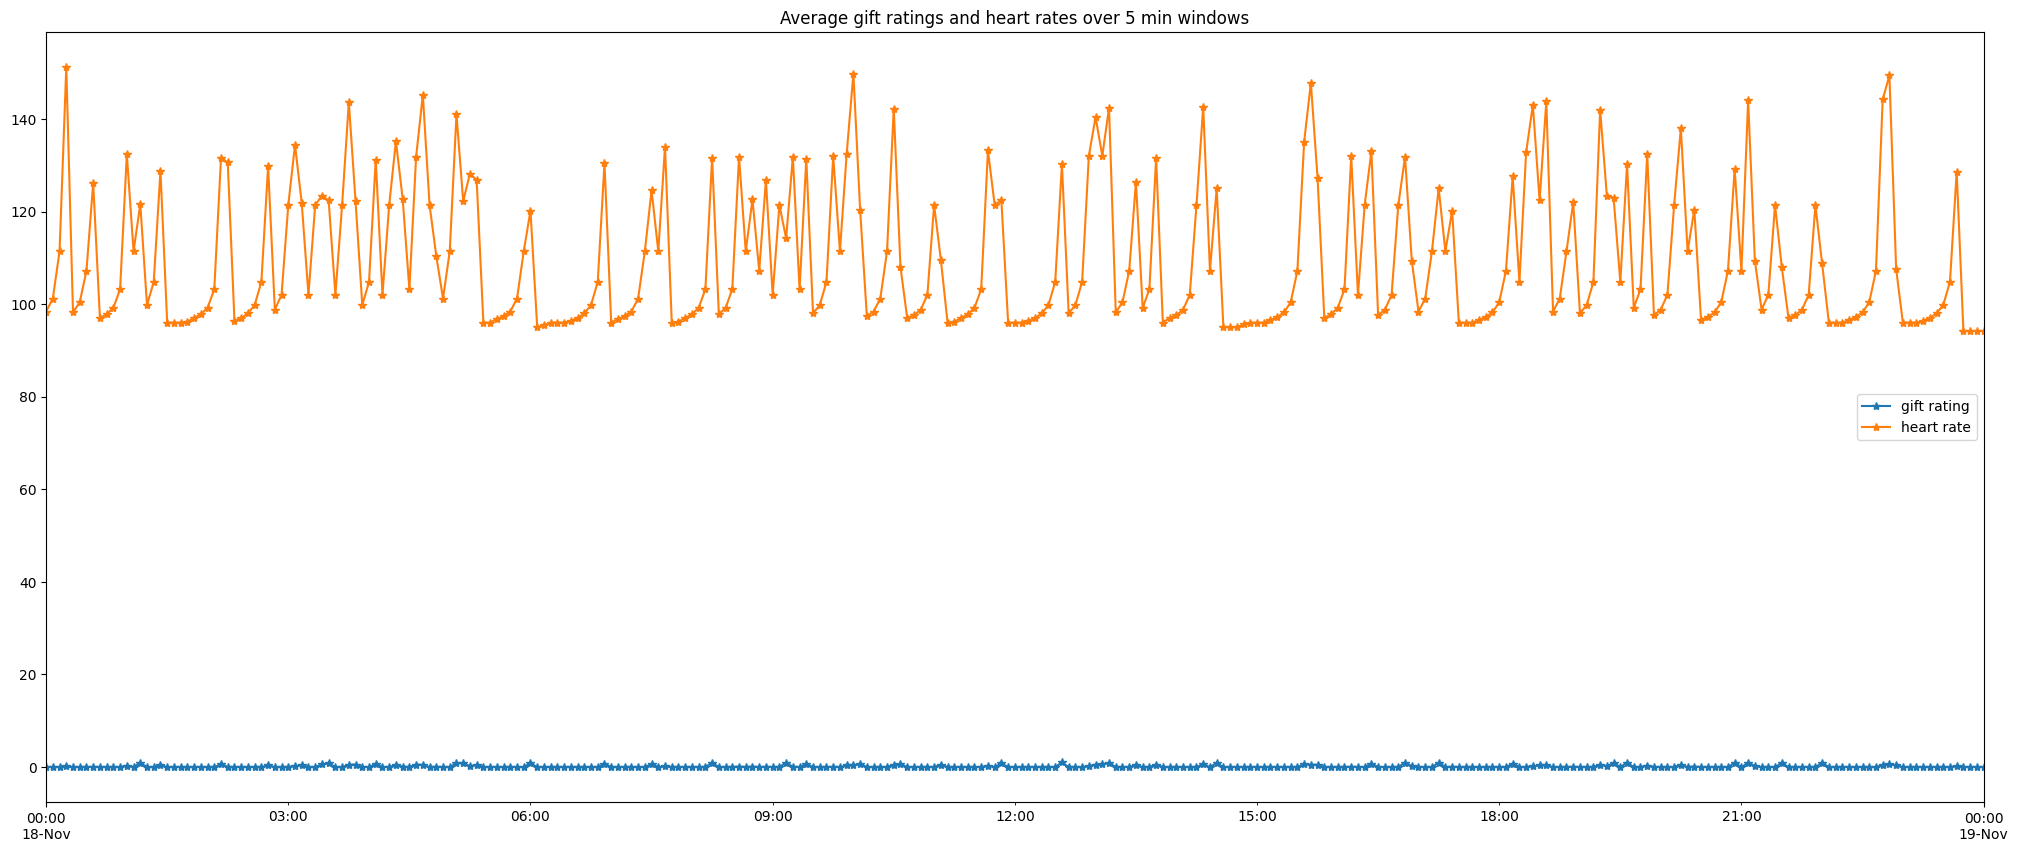

In [ ]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

Now let's try windowing the heart rate data using the gift event data and the `nonstationary_window` function. First we have to calculate the start and end times of the intervals between events.

In [ ]:
gift_es.calc_start_end()
gift_es.ns_window

[(Timestamp('1999-11-18 00:16:00'), Timestamp('1999-11-18 00:19:00')),
 (Timestamp('1999-11-18 00:19:00'), Timestamp('1999-11-18 00:37:00')),
 (Timestamp('1999-11-18 00:37:00'), Timestamp('1999-11-18 01:04:00')),
 (Timestamp('1999-11-18 01:04:00'), Timestamp('1999-11-18 01:11:00')),
 (Timestamp('1999-11-18 01:11:00'), Timestamp('1999-11-18 01:28:00')),
 (Timestamp('1999-11-18 01:28:00'), Timestamp('1999-11-18 02:14:00')),
 (Timestamp('1999-11-18 02:14:00'), Timestamp('1999-11-18 02:18:00')),
 (Timestamp('1999-11-18 02:18:00'), Timestamp('1999-11-18 02:48:00')),
 (Timestamp('1999-11-18 02:48:00'), Timestamp('1999-11-18 03:05:00')),
 (Timestamp('1999-11-18 03:05:00'), Timestamp('1999-11-18 03:06:00')),
 (Timestamp('1999-11-18 03:06:00'), Timestamp('1999-11-18 03:11:00')),
 (Timestamp('1999-11-18 03:11:00'), Timestamp('1999-11-18 03:25:00')),
 (Timestamp('1999-11-18 03:25:00'), Timestamp('1999-11-18 03:31:00')),
 (Timestamp('1999-11-18 03:31:00'), Timestamp('1999-11-18 03:45:00')),
 (Time

Now we window the heart rate time series data using the timestamps of the gift event series data:

In [ ]:
ns_window_df = hr_ts.nonstationary_window(gift_es)
ns_window_df

,heart_rate
1999-11-18 00:19:00,110.000000
1999-11-18 00:37:00,109.277778
1999-11-18 01:04:00,105.222222
1999-11-18 01:11:00,124.428571
1999-11-18 01:28:00,109.705882
...,...
1999-11-18 22:47:00,101.361702
1999-11-18 22:50:00,145.333333
1999-11-18 22:52:00,155.500000
1999-11-18 22:55:00,144.666667


Let's visualize the windowed data over time:

<Axes: title={'center': 'Average heart rates in between gift events'}>

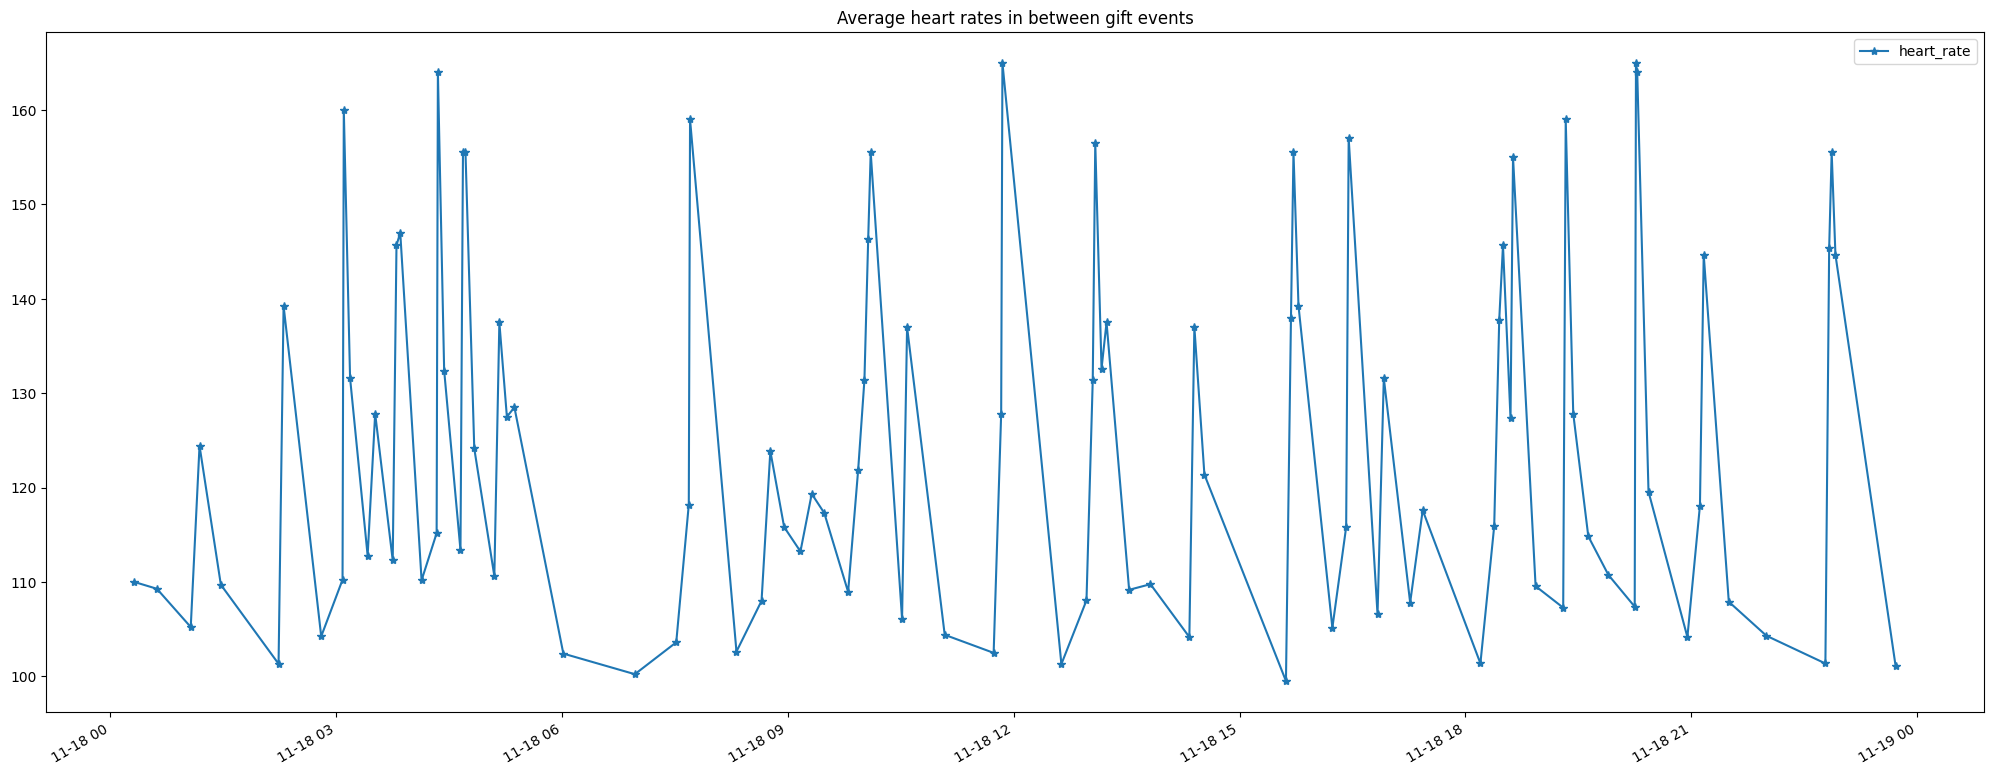

In [ ]:
fig, ax = plt.subplots()
# gift_es.data.plot(ax=ax, marker='*')
ns_window_df.plot(figsize=(25,10), ax=ax, title='Average heart rates in between gift events', marker='*')
# ax.legend(['gift rating', 'avg heart rate'])

Now we show how to use the `window` function from `TimeFrame` to do nonstationary windowing of the data. The `window` function in `TimeFrame` calls the `TimeSeries` function `nonstationary_window` that we called manually in the previous demonstration. Notice that we pass in `gift_es` to the `freq` parameter:

In [ ]:
ns_window_timeframe = tf.window(freq=gift_es)
ns_window_timeframe

,gift_rating,heart_rate
1999-11-18 00:16:00,0.081608,0.000000
1999-11-18 00:19:00,0.181914,110.000000
1999-11-18 00:37:00,0.050523,109.277778
1999-11-18 01:04:00,0.302746,105.222222
1999-11-18 01:11:00,0.913990,124.428571
...,...,...
1999-11-18 22:47:00,0.451192,101.361702
1999-11-18 22:50:00,0.713990,145.333333
1999-11-18 22:52:00,0.414805,155.500000
1999-11-18 22:55:00,0.422551,144.666667


Now we plot the windowed heart rates against the rating for each gift: 

<Axes: xlabel='heart_rate', ylabel='gift_rating'>

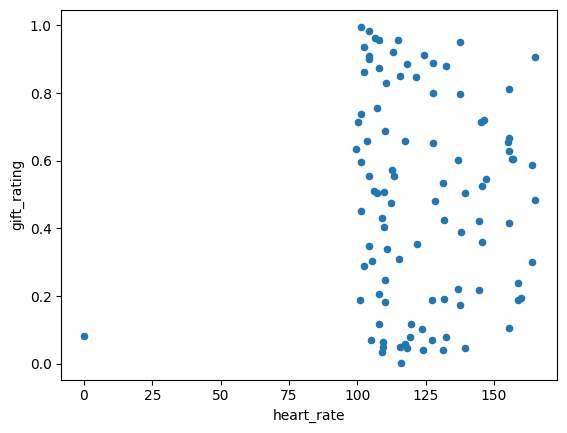

In [ ]:
ns_window_timeframe.plot(x='heart_rate', y='gift_rating', kind='scatter')